In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Import dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Encode categorical data
labelencoderX1 = LabelEncoder()
X[:, 1] = labelencoderX1.fit_transform(X[:, 1])
labelencoderX2 = LabelEncoder()
X[:, 2] = labelencoderX2.fit_transform(X[:, 2])

In [4]:
# Divide the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Load Model
model = load_model('../model/churn_model.h5')

Text(0.5, 17.5, &#39;Predicted label&#39;)

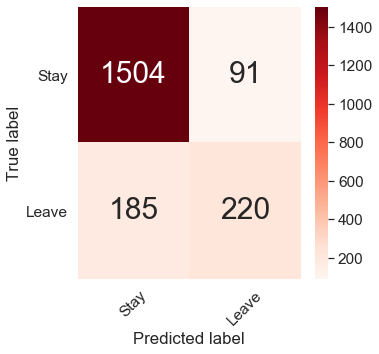

In [7]:
# Model Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix with seaborn
plt.figure(figsize=(5,5))
x_axis_labels = ['Stay', 'Leave']
y_axis_labels = ['Stay', 'Leave']
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, annot_kws={"size": 30} , cmap="Reds", fmt='g')
plt.yticks(rotation=360)
plt.xticks(rotation=45)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [8]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.77      2000
weighted avg       0.85      0.86      0.85      2000



In [10]:
# Make a Single Prediction
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of Products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000
prediction = ""
new_prediction = model.predict(sc.transform(np.array([[0, 0, 0, 70, 0, 0, 0, 0, 0, 0]])))
if new_prediction >= 0.5:
    prediction = "Leave"
else:
    prediction = "Stay"
print("This Costumer is Potentialy Going To {}, with Leaving Probability: {}%".format(prediction, round(new_prediction.item()*100 ,2)))

This Costumer is Potentialy Going To Leave, with Leaving Probability: 52.84%
